<a href="https://colab.research.google.com/github/Afanasyy/colab/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%BC_%D0%BC%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB%D0%BE%D0%BC_TXT%2C_JSON%2C_HTML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа с текстовым материалом (TXT, CSV, JSON, HTML)

* Работа с текстовыми файлами (`.txt`, `.csv`)
* Работа с JSON файлами
* Работа с веб-сайтами и парсинг `HTML`

## Работа с текстовыми файлами



### `TXT`

Самый простой формат, в котором могут храниться текстовые данные – `txt`. Сплошной текст, часто без форматирования.

Перед началом работы с файлом его следует открыть. Для этого в Python есть функция `open`, принимающая на вход путь до файла, режим работы с файлом и кодировку:

`fd = open('path/to/file', mode='r', encoding='utf-8')`

* `path/to/file` - путь до файла. **NB**: файл должен существовать!
* `r` - режим работы, в данном случае (и по умолчанию) `read` - чтение. Возможные режимы:
  * `r` (read) - чтение;
  * `w` (write) - запись;
  * `a` (append) - добавление;
  * `x` - создание.
* `utf-8` - кодировка, которая используется для понимания символов. Для кириллицы чаще всего используется `utf-8`. [Узнать больше о кодировках](https://habr.com/ru/post/478636/).


**NB**: После окончания работы с файлом его следует закрыть:

`fd.close()`

#### Чтение

In [ ]:
# Открытие файла
fd = open('/content/sample.txt', mode='r', encoding='utf-8')

FileNotFoundError: ignored

In [ ]:
# Чтение всего, что есть в файле
text = fd.read()
print(text)

In [ ]:
fd.close()

По умолчанию метод `read()` возвращает весь текст целиком, но вы также можете указать, сколько символов вы хотите прочитать.

In [ ]:
fd = open('/content/sample.txt', mode='r', encoding='utf-8')
print(fd.read(5))
fd.close()

In [ ]:
fd = open('/content/sample.txt', 'r', encoding='utf-8')
data = fd.read()
print(data)
print(data.split('\n'))
fd.close()

Вы можете вернуть одну строку, используя метод `readline()`.

In [ ]:
fd = open('/content/sample.txt', 'r', encoding='utf-8')
print(fd.readline())
fd.close()

Итерируясь по файлу, вы можете прочитать весь файл целиком, строка за строкой.

In [ ]:
fd = open('/content/sample.txt', 'r', encoding='utf-8')
for line in fd:
  print(line)
fd.close()

Чтобы не прописывать операцию закрытия файла каждый раз, вместо этого можно использовать специальную конструкцию `with as`, тогда файл будет закрыт автоматически.

[Больше о `with as`](https://pythonworld.ru/osnovy/with-as-menedzhery-konteksta.html).

In [ ]:
with open('/content/sample.txt', 'r', encoding='utf-8') as fd:
  for line in fd:
    print(line)

#### Запись

Для записи в существующий файл необходимо добавить параметр в функцию `open()`:

* `a` - добавит в конец файла;

* `w` - перезапишет любой существующий контент.

In [ ]:
with open('/content/sample.txt', 'a', encoding='utf-8') as fd:
  fd.write('\nAnother line')

In [ ]:
# К уже существующим строкам добавилась новая

with open('/content/sample.txt', 'r', encoding='utf-8') as fd:
  print(fd.read())

In [ ]:
with open('/content/sample_2.txt', 'w', encoding='utf-8') as fd:
  fd.write('\nAnother line')

# Предыдущие данные были стёрты
with open('/content/sample_2.txt', 'r', encoding='utf-8') as fd:
  print(fd.read())

In [ ]:
with open('/content/sample_2.txt', 'w', encoding='utf-8') as fd:
  fd.write('\nNew line')

#### Создание

Чтобы создать новый файл в Python, используйте метод `open()` с одним из следующих параметров:

* `x` - создаст файл, возвращает ошибку, если файл существует

* `a` - создаст файл, если указанный файл не существует

* `w` - создаст файл, если указанный файл не существует

In [ ]:
with open('/content/created_with_x.txt', 'x', encoding='utf-8') as fd:
  fd.write('\nAnother line')

with open('/content/created_with_x.txt', 'r', encoding='utf-8') as fd:
  print(fd.read())

In [ ]:
with open('/content/created_with_w.txt', 'w', encoding='utf-8') as fd:
  fd.write('\nAnother line')

with open('/content/created_with_w.txt', 'r', encoding='utf-8') as fd:
  print(fd.read())

### `CSV`

Данные, с которыми приходится работать, часто представлены в формате `csv` – от слов comma separated values, то есть значения, разделенные запятыми. Это текстовый формат для представления табличных данных.

Для работы с файлами `csv` в Python есть специальный встроенный модуль `csv`.

In [ ]:
import csv

In [ ]:
with open('/content/kinopoisk-top250.csv', 'r', encoding='utf-8') as data_file:
  reader = csv.DictReader(data_file)
  
  data = [line for line in reader] 

FileNotFoundError: ignored

In [ ]:
data[0]

In [ ]:
data[1]

In [ ]:
print(f'Наименьший рейтинг: {data[-1]["rating_ball"]},\nНаибольший рейтинг: {data[0]["rating_ball"]}')

In [ ]:
directors = [film['director'].strip() for film in data]
directors

In [ ]:
directors_frequency = {director: directors.count(director) for director in directors}

directors_frequency = sorted(directors_frequency.items(), key=lambda director: director[1], reverse=True)
directors_frequency

In [ ]:
for film in data:
  if film['director'].strip() == 'Игорь Масленников':
    print(film['movie'])

Также `csv` файлы можно создавать:

In [ ]:
with open('names.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Имя', 'Фамилия']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Имя': 'Андрей', 'Фамилия': 'Иванов'})
    writer.writerow({'Имя': 'Иван', 'Фамилия': 'Андреев'})
    writer.writerow({'Имя': 'Иван', 'Фамилия': 'Иванович'})

## Работа с `JSON` файлами

`JSON` (JavaScript Object Notation) - простой формат обмена данными, удобный для чтения и написания как человеком, так и компьютером. Он основан на подмножестве языка программирования JavaScript.

`JSON` - текстовый формат, полностью независимый от языка реализации, но он использует соглашения, знакомые программистам C-подобных языков, таких как C, C++, C#, Java, JavaScript, Perl, Python и многих других. Эти свойства делают JSON идеальным языком обмена данными.

JSON основан на двух структурах данных:

* Коллекция пар ключ/значение. В разных языках, эта концепция реализована как объект, запись, структура, словарь, хэш, именованный список или ассоциативный массив.
* Упорядоченный список значений. В большинстве языков это реализовано как массив, вектор, список или последовательность.

Это универсальные структуры данных. Почти все современные языки программирования поддерживают их в какой-либо форме. Логично предположить, что формат данных, независимый от языка программирования, должен быть основан на этих структурах.

В нотации JSON это выглядит так:

Объект - неупорядоченный набор пар ключ/значение. 

* Объект начинается с `{` открывающей фигурной скобки и заканчивается `}` закрывающей фигурной скобкой. 
* Каждое имя сопровождается `:` двоеточием, пары ключ/значение разделяются `,` запятой.
* **NB**: Ключ - всегда строка.

```
{
  "query": "Виктор Иван",
  "count": 7
}
```

Массив - упорядоченная коллекция значений. 

* Массив начинается с `[` открывающей квадратной скобки и заканчивается `]` закрывающей квадратной скобкой. Значения разделены `,` запятой.

```
[ "MALE", "FEMALE" ]
```


* Значение может быть:
  * строкой в двойных кавычках, 
  * числом, 
  * `true`, `false`, `null`, 
  * объектом или массивом. 

Эти структуры могут быть вложенными.

```
[
        {
            "value": "Иванов Виктор",
            "unrestricted_value": "Иванов Виктор",
            "data": {
                "surname": "Иванов",
                "name": "Виктор",
                "patronymic": null,
                "gender": "MALE"
            }
        },
        {
            "value": "Иванченко Виктор",
            "unrestricted_value": "Иванченко Виктор",
            "data": {
                "surname": "Иванченко",
                "name": "Виктор",
                "patronymic": null,
                "gender": "MALE"
            }
        },
        {
            "value": "Виктор Иванович",
            "unrestricted_value": "Виктор Иванович",
            "data": {
                "surname": null,
                "name": "Виктор",
                "patronymic": "Иванович",
                "gender": "MALE"
            }
        }
]
```

Для работы с файлами в формате `JSON` в Python есть встроенный модуль `json`.

In [ ]:
import json

Как правило, процесс кодирования `JSON` называется сериализация. Этот термин обозначает трансформацию данных в серию байтов (следовательно, серийных) для хранения или передачи по сети. 

Естественно, десериализация — является противоположным процессом декодирования данных, которые хранятся или направлены в стандарт `JSON`.

Звучит как много технических терминов, но в реальности, все, о чем мы сейчас говорим — это чтение и написание. 
Представьте это следующим образом: кодирование это запись данных на диск, в то время как декодирование — это чтение данных в памяти.

Соответствие типов данных в Python и в `JSON`:

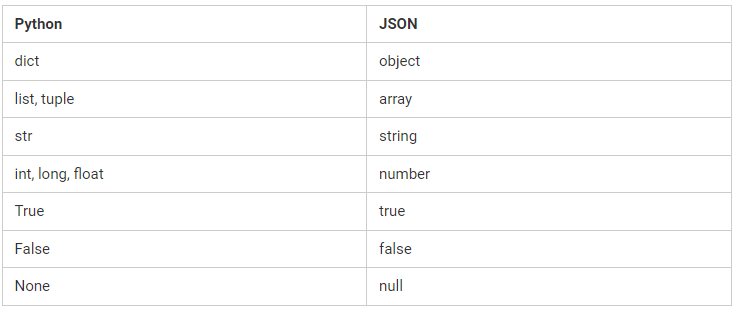

### Сериализация (превращение данных в `JSON`)

In [ ]:
data = {
    "president": {
        "name": "Zaphod Beeblebrox",
        "species": "Betelgeusian"
    }
}

In [ ]:
with open("data_file.json", "w", encoding='utf-8') as write_file:
    json.dump(data, write_file)

Обратите внимание на то, что `dump()` принимает два позиционных аргумента: (1) объект данных, который сериализуется и (2), файловый объект, в который будут вписаны байты.

### Десериализация (превращение из `JSON`)

В модуле `json` вы найдете `load()` и `loads()` для превращения кодированных данных JSON в объекты Python.

In [ ]:
with open("data_file.json", "r") as read_file:
    data = json.load(read_file)

print(data)
print(type(data))

{'president': {'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}}
<class 'dict'>


In [ ]:
json_string = """
{
    "researcher": {
        "name": "Ford Prefect",
        "species": "Betelgeusian",
        "relatives": [
            {
                "name": "Zaphod Beeblebrox",
                "species": "Betelgeusian"
            }
        ]
    }
}
"""
 
data = json.loads(json_string)
print(data)

{'researcher': {'name': 'Ford Prefect', 'species': 'Betelgeusian', 'relatives': [{'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}]}}


## Работа с веб-сайтами и парсинг `HTML`

Веб-страницы, которые мы видим в Интернете, создаются с использованием HTML.

Эта аббревиатура расшифровывается как "HyperText Markup Language" - язык гипертекстовой разметки.

Технически это обычный текст.

Но в отличие от обычного текста содержимое HTML-документа структурировано с помощью тегов.

Теги представляют собой ключевые слова, заключенные в угловые скобки `<` и `>`.

Есть теги, которые отмечают начало и конец части документа. Соответственно, существуют открывающие и закрывающие теги.

Например, все абзацы текста помечены тегами `<p>` и `</p>`.

```html
<p>All ready, Miss Welse, though I'm sorry we can't spare one of the steamer's boats.</p>
```

Заголовки помечены с помощью тегов `<h1></h1>`, `<h2></h2>`, `<h3></h3>` и так далее. Число указывает на уровень иерархии заголовков.

```html
<h1>Oliver Twist</h1>
<h2>Chapter I</h2>
```

Содержимое HTML включает в себя головную часть `<head></head>` и тело `<body></body>`.

В заголовочной части описываются свойства документа: его заголовок, набор символов, требуемые дополнительные ресурсы и так далее.

Часть тела содержит информацию, показываемую пользователю.

```html
<!doctype html>
<html lang="en-US">
<head>
    <title>Заголовок страницы</title>
    <meta charset="utf-8">
</head>
<body>
  <h1>Главный заголовок</h1>
  <p>Текстовый абзац</p>
  <p>Текстовый абзац</p>
</body>
</html>
```    

Еще несколько тегов:

Жирный шрифт:
```html
<b>Это очень важно</b>
```

Курсив:
```html
<i>Также обратите внимание на этот момент</i>
```

Гиперссылка:

```html
<a href="https://www.wikipedia.org /">Нажмите здесь, чтобы посетить Википедию</a>
```
    
Изображение (обратите внимание, что у этого тега нет закрывающего)
```html
<img src="https://images.com/animals/dog.jpg ">
```

Блок тегов, например абзацы с некоторым общим свойством форматирования

```html
<div>
    <p>Автор: Джон Доу</p>
    <p>Год выпуска: 2021</p>
</div>
```

Каждый тег может иметь атрибуты. Например, тег `<img>` имеет атрибут `src`, а тег `<a>` имеет атрибут `href`.

Также каждый тег может иметь атрибуты `id` и `class`. 

`id` полезен для идентификации определенных тегов для создания интерактивных веб-страниц.

`class` используется для применения форматирования.

```html
<p id='автор'>Джейн Остин</p>
```

### Парсинг простой веб-страницы

Основная проблема с веб-страницами заключается в том, что обычно они имеют очень сложную структуру.

Более того, веб-дизайнеры часто не следуют строгим логическим правилам построения структуры HTML, так что
автоматический анализ веб-страниц может быть очень сложным.

Для начала попробуем проанализировать простую веб-страницу.


Ссылка: [Чарльз Диккенс](https://kupav.github.io/data-sc-intro/dickens.html )

Чтобы извлечь информацию с веб-страницы, нам сначала нужно ее загрузить. 

Это делается с помощью модуля `requests`.

In [ ]:
import requests

In [ ]:
# Ссылка
url = "https://kupav.github.io/data-sc-intro/dickens.html"

# С помощью метода get мы получаем веб-страницу
raw_data = requests.get(url)

In [ ]:
# Вся информация с веб-страницы
raw_data.text

'<!doctype html>\n<html lang="en-US">\n<head>\n    <title>data-sc-intro</title>\n    <meta charset="utf-8">\n</head>\n<body>\n\n  <h1>Fragment of Hard Times by Charles Dickens</h1>\n\n  <img src="dickens.jpg">\n\n  <p>Hard Times is the tenth novel by Charles Dickens, first published\n  in 1854. The book surveys English society and satirises the social\n  and economic conditions of the era. </p>\n  \n  <h2>CHAPTER I - THE ONE THING NEEDFUL</h2>\n\n  <p>\'NOW, what I want is, <b>Facts</b>. Teach these boys and girls nothing\n  but Facts. Facts alone are wanted in life. Plant nothing else, and\n  root out everything else. You can only form the minds of reasoning\n  animals upon Facts: nothing else will ever be of any service to\n  them. This is the principle on which I bring up my own children, and\n  this is the principle on which I bring up these children. Stick to\n  Facts, sir!\'</p>\n\n  <p>The scene was a plain, bare, monotonous vault of a school-room,\n  and the speaker\'s square f

Эту информацию можно парсить. 

"Парсинг" означает выявление структуры и сопоставление ее с иерархией объектов Python.

Синтаксический анализ выполняется с помощью анализатора `BeautifulSoup`, соответствующее имя модуля Python - `bs4`.

In [ ]:
from bs4 import BeautifulSoup

# Объект, в котором будет сохранён результат парсинга
soup = BeautifulSoup(raw_data.text, 'html5lib')

print(soup)

<!DOCTYPE html>
<html lang="en-US"><head>
    <title>data-sc-intro</title>
    <meta charset="utf-8"/>
</head>
<body>

  <h1>Fragment of Hard Times by Charles Dickens</h1>

  <img src="dickens.jpg"/>

  <p>Hard Times is the tenth novel by Charles Dickens, first published
  in 1854. The book surveys English society and satirises the social
  and economic conditions of the era. </p>
  
  <h2>CHAPTER I - THE ONE THING NEEDFUL</h2>

  <p>'NOW, what I want is, <b>Facts</b>. Teach these boys and girls nothing
  but Facts. Facts alone are wanted in life. Plant nothing else, and
  root out everything else. You can only form the minds of reasoning
  animals upon Facts: nothing else will ever be of any service to
  them. This is the principle on which I bring up my own children, and
  this is the principle on which I bring up these children. Stick to
  Facts, sir!'</p>

  <p>The scene was a plain, bare, monotonous vault of a school-room,
  and the speaker's square forefinger <i>emphasized</i> hi

#### Поиск информации в документе

In [ ]:
# Находит только первый элемент с тегом <p>
print(soup.find('p'))

<p>Hard Times is the tenth novel by Charles Dickens, first published
  in 1854. The book surveys English society and satirises the social
  and economic conditions of the era. </p>


In [ ]:
print(soup.find('p').text)

Hard Times is the tenth novel by Charles Dickens, first published
  in 1854. The book surveys English society and satirises the social
  and economic conditions of the era. 


In [ ]:
# Поиск всех элементов с тегом <h2>
all_h2 = soup.find_all('h2')
print(type(all_h2))
print(all_h2)

<class 'bs4.element.ResultSet'>
[<h2>CHAPTER I - THE ONE THING NEEDFUL</h2>, <h2>CHAPTER II - MURDERING THE INNOCENTS</h2>]


In [ ]:
# Взятие текста из каждого заголовка
print([x.text for x in soup('h2')])

['CHAPTER I - THE ONE THING NEEDFUL', 'CHAPTER II - MURDERING THE INNOCENTS']


Теги могут быть вложенными.

И у каждого тега есть собственный метод `find_all`, который ищет внутри только внутри текущего тега, а не по всему документу.

In [ ]:
# Поиск всех элементов с тегом <p>, в которых есть элементы с тегами <i> или <b>

all_p = soup.find_all('p')
for tag in all_p:
    if len(tag.find_all('i')) != 0:
        print(tag)
    if len(tag.find_all('b')) != 0:
        print(tag)

<p>'NOW, what I want is, <b>Facts</b>. Teach these boys and girls nothing
  but Facts. Facts alone are wanted in life. Plant nothing else, and
  root out everything else. You can only form the minds of reasoning
  animals upon Facts: nothing else will ever be of any service to
  them. This is the principle on which I bring up my own children, and
  this is the principle on which I bring up these children. Stick to
  Facts, sir!'</p>
<p>The scene was a plain, bare, monotonous vault of a school-room,
  and the speaker's square forefinger <i>emphasized</i> his observations by
  underscoring every sentence with a line on the schoolmaster's
  sleeve. The emphasis was helped by the speaker's square wall of a
  forehead, which had his eyebrows for its base, while his eyes found
  commodious cellarage in two dark caves, overshadowed by the
  wall. The emphasis was helped by the speaker's mouth, which was
  wide, thin, and hard set. The emphasis was helped by the speaker's
  voice, which was in

In [ ]:
# Поиск всех картинок
print(soup('img'))

# Обратите внимание, что такая запись эквивалентна soup.find_all('img')

[<img src="dickens.jpg"/>]


In [ ]:
# Поиск всех гиперссылок
print(soup('a'))

[<a href="https://en.wikipedia.org/wiki/Gradgrind">Thomas
  Gradgrind</a>, <a href="https://en.wikipedia.org/wiki/Charles_Dickens">See Charles
      Dickens in Wikipedia</a>]


In [ ]:
# Весь текст со страницы
print(soup.text)

### Парсинг страницы Википедии

In [ ]:
url = 'https://ru.wikipedia.org/wiki/Netflix'
raw_data = requests.get(url)
soup = BeautifulSoup(raw_data.text, 'html5lib')

# Структура этой страницы намного сложнее
print(soup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru"><head>
<meta charset="utf-8"/>
<title>Netflix — Википедия</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"b1796b1e-399e-48c4-be58-e189d22b3f2e","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Netflix","wgTitle":"Netflix","wgCurRevisionId":120557852,"wgRevisionId":120557852,"wgArticleId":3406461,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Википедия:Cite news (заполнен параметр id)","Википедия:Cite web (не указан язык)","Википедия:Страницы с ежедневно очищаемым кэшем",
"Википедия:Статьи со ссылками на элемент

In [ ]:
# Найдём все заголовки
print(soup('h1'))

[<h1 class="firstHeading mw-first-heading" id="firstHeading">Netflix</h1>]


In [ ]:
for tag in soup('h2'):
  print(tag.text)

Содержание
История[править | править код]
Собственники[править | править код]
Технические детали и тарифы[править | править код]
Материалы[править | править код]
Галерея[править | править код]
См. также[править | править код]
Примечания[править | править код]
Ссылки[править | править код]
Навигация


In [ ]:
# Найдём все параграфы и сохраним их текст
main_text = ''
for tag in soup('p'):
  main_text += tag.text

main_text

'Netflix\xa0— американская развлекательная компания, стриминговый сервис фильмов и сериалов. Основана 29 августа 1997 года Ридом Хастингсом и Марком Рэндольфом[3]. Штаб-квартира находится в Лос-Гатосе, Калифорния.\nС 2013 года Netflix производит собственные фильмы и сериалы, в том числе и анимационные, а также телепрограммы. В 2016 году компания выпустила 126 оригинальных сериалов и фильмов\xa0— больше, чем любой другой сетевой или кабельный канал[4]. Их усилия по производству нового контента, обеспечению прав на дополнительный контент и диверсификации через 190 стран потребовали дополнительных капиталов, привлекаемых в том числе через займы. Суммарный долг в 2016 году составил 16,8\xa0млрд долларов, по состоянию на сентябрь 2017 года он был уже 21,9\xa0млрд долларов[5]. При этом 6,5 миллиарда долларов\xa0— это долгосрочный долг, а остальная часть\xa0— долгосрочные обязательства[6]. В октябре 2018 года Netflix объявила о привлечении ещё 2 миллиардов долларов для финансирования нового к

In [ ]:
# Весь текст со страницы можно взять с помощью атрибута .text
soup.text

'\n\nNetflix — Википедия\ndocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"b1796b1e-399e-48c4-be58-e189d22b3f2e","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Netflix","wgTitle":"Netflix","wgCurRevisionId":120557852,"wgRevisionId":120557852,"wgArticleId":3406461,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Википедия:Cite news (заполнен параметр id)","Википедия:Cite web (не указан язык)","Википедия:Страницы с ежедневно очищаемым кэшем",\n"Википедия:Статьи со ссылками на элементы Викиданных без русской подписи","Википедия:Статьи с источниками из Викиданных","Википедия:Глобализиров

## Полезные и использованные ссылки

* https://istories.media/workshops/2021/01/29/vvedenie-v-python-chast-11-rabota-s-failami/
* https://python-scripts.com/json